<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine_Learning_Algorithms-2021/blob/main/04-Decision-Tree-Classifier/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Tree Basics

In [1]:
# Miguel Ángel Hernández Tapia 23/02/2021

# DEFINING THE NODE CLASS TO CREATE OUR BINARY TREES ALONG WITH THEIR METHODS
class Node:

    # Constructor to initialize the node object
    def __init__(self, data):
        self.left = None   # Left child of the node
        self.right = None  # Right child of the node
        self.data = data   # Data (value) of the node

    # Method to insert a new node into the tree
    def insert(self, data):
        # If the current node has data
        if self.data:
            # If the data to insert is less than the current node's data
            if data < self.data:
                # If left child is empty, insert data there
                if self.left is None:
                    self.left = Node(data)
                # Else, move to the left child and try inserting again
                else:
                    self.left.insert(data)
            # If the data to insert is greater than the current node's data
            elif data > self.data:
                # If right child is empty, insert data there
                if self.right is None:
                    self.right = Node(data)
                # Else, move to the right child and try inserting again
                else:
                    self.right.insert(data)
        # If the current node is empty, add data here
        else:
            self.data = data


    # In-order traversal: Left -> Root -> Right
    def inorderTraversal(self, root):
        res = []
        if root:
            res += self.inorderTraversal(root.left)
            res.append(root.data)
            res += self.inorderTraversal(root.right)
        return res

    # Post-order traversal: Left -> Right -> Root
    def PostorderTraversal(self, root):
        res = []
        if root:
            res += self.PostorderTraversal(root.left)
            res += self.PostorderTraversal(root.right)
            res.append(root.data)
        return res

    # Pre-order traversal: Root -> Left -> Right
    def PreorderTraversal(self, root):
        res = []
        if root:
            res.append(root.data)
            res += self.PreorderTraversal(root.left)
            res += self.PreorderTraversal(root.right)
        return res

# Define a function to print the tree structure in a visual format
def printTree(node, level=0):
    if node != None:
        printTree(node.left, level + 1)
        # Print the node data with appropriate indentation based on its level
        print(' ' * 4 * level + '-> ' + str(node.data))
        printTree(node.right, level + 1)

# Code sourced from
# https://www.tutorialspoint.com/python_data_structure/python_tree_traversal_algorithms.htm

In [2]:
# THE NUMBERS ARE STORED AS NODES HERE

import random

# Function to create a list of unique random values between 0 and 100
def create_values(total):
    if total > 100:
        raise ValueError("Error, Is not possible")
    return random.sample(range(101), total)

# Generate a list of 30 random values
random_values = create_values(30)

In [3]:
# Function to insert values from a list into a binary tree
def save_to_root(list_values):
    # Create a root node with initial value of 0
    root = Node(0)
    # Insert each value from the list into the tree
    for value in list_values:
        root.insert(value)
    return root

# Create the binary tree with the random values
root = save_to_root(random_values)

In [4]:
# Create trees for InOrder, PreOrder, and PostOrder traversals
InOrder = save_to_root([value for value in root.inorderTraversal(root)])
PreOrder = save_to_root([value for value in root.PreorderTraversal(root)])
PostOrder = save_to_root([value for value in root.PostorderTraversal(root)])

In [5]:
printTree(InOrder)

-> 12
    -> 15
        -> 17
            -> 20
                -> 26
                    -> 28
                        -> 37
                            -> 41
                                -> 44
                                    -> 48
                                        -> 55
                                            -> 56
                                                -> 58
                                                    -> 60
                                                        -> 63
                                                            -> 66
                                                                -> 71
                                                                    -> 72
                                                                        -> 74
                                                                            -> 78
                                                                                -> 82
                                  

In [6]:
printTree(PreOrder)

                    -> 12
                -> 15
                    -> 17
            -> 20
        -> 26
                    -> 28
                -> 37
                    -> 41
            -> 44
                        -> 48
                    -> 55
                        -> 56
                -> 58
    -> 60
        -> 63
            -> 66
                -> 71
-> 72
            -> 74
                        -> 78
                    -> 82
                                -> 85
                            -> 87
                        -> 88
                -> 91
                        -> 94
                    -> 95
        -> 96
    -> 97
        -> 99


In [7]:
printTree(PostOrder)

-> 12
        -> 15
    -> 17
        -> 20
                -> 26
            -> 28
                    -> 37
                -> 41
                        -> 44
                    -> 48
                            -> 55
                        -> 56
                            -> 58
                                            -> 60
                                        -> 63
                                    -> 66
                                -> 71
                                            -> 72
                                        -> 74
                                    -> 78
                                            -> 82
                                        -> 85
                                            -> 87
                                                -> 88
                                                        -> 91
                                                    -> 94
                                                        -> 95
                  

# Decision Tree Classifier

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

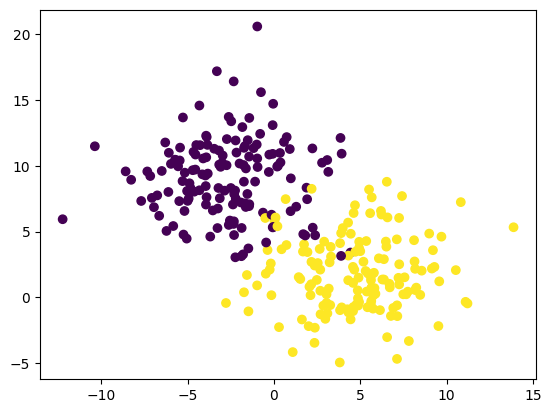

In [20]:
# Create synthetic 2D data
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=3)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Score for accuracy, precision, recall, and show confusion matrix
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9333333333333333
Precision: 0.9375
Recall: 0.9375

Confusion Matrix:
 [[39  3]
 [ 3 45]]


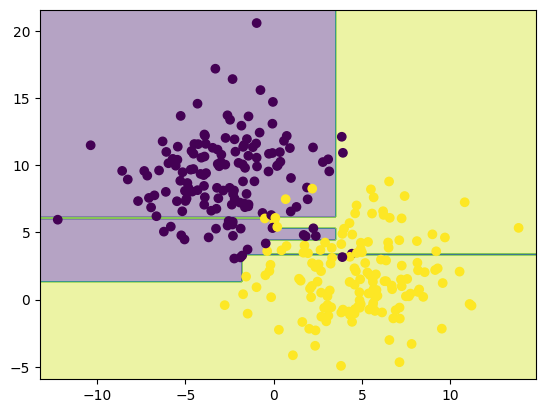

In [24]:
# Plot the data points and decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()